In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 6

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/32 [==============================] - 0s 5ms/step - loss: 1.6588 - accuracy: 0.2870 - val_loss: 1.5197 - val_accuracy: 0.4130

Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.5469 - accuracy: 0.3487 - val_loss: 1.4411 - val_accuracy: 0.4523

Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.4905 - accuracy: 0.3704 - val_loss: 1.3939 - val_accuracy: 0.5093

Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.4553 - accuracy: 0.3907 - val_loss: 1.3416 - val_accuracy: 0.5307

Epoch 00004: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 1.4233 - accuracy: 0.4109 - val_lo


Epoch 00037: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 38/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8618 - accuracy: 0.6923 - val_loss: 0.5381 - val_accuracy: 0.8756

Epoch 00038: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 39/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8670 - accuracy: 0.6804 - val_loss: 0.5406 - val_accuracy: 0.8742

Epoch 00039: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 40/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8547 - accuracy: 0.6967 - val_loss: 0.5317 - val_accuracy: 0.8734

Epoch 00040: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 41/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.6913 - val_loss: 0.5234 - val_accuracy: 0.8779

Epoch 00041: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 42/1000
32/32 [==

32/32 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.7293 - val_loss: 0.4326 - val_accuracy: 0.8853

Epoch 00074: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 75/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.7389 - val_loss: 0.4217 - val_accuracy: 0.8875

Epoch 00075: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 76/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7483 - accuracy: 0.7327 - val_loss: 0.4231 - val_accuracy: 0.8890

Epoch 00076: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 77/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.7290 - val_loss: 0.4234 - val_accuracy: 0.8927

Epoch 00077: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 78/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7546 - accuracy: 0.7347 - val_loss: 0.422


Epoch 00110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 111/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.7419 - val_loss: 0.3885 - val_accuracy: 0.8949

Epoch 00111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 112/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.7549 - val_loss: 0.3847 - val_accuracy: 0.8993

Epoch 00112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 113/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.7367 - val_loss: 0.3855 - val_accuracy: 0.9008

Epoch 00113: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 114/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.7549 - val_loss: 0.3828 - val_accuracy: 0.8971

Epoch 00114: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 115/1000
32/3

32/32 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.7463 - val_loss: 0.3664 - val_accuracy: 0.9045

Epoch 00147: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 148/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7616 - val_loss: 0.3632 - val_accuracy: 0.9038

Epoch 00148: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 149/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.7604 - val_loss: 0.3562 - val_accuracy: 0.9097

Epoch 00149: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 150/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7643 - val_loss: 0.3600 - val_accuracy: 0.9053

Epoch 00150: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 151/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.7500 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 184/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.7683 - val_loss: 0.3612 - val_accuracy: 0.9030

Epoch 00184: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
Epoch 00184: early stopping


In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.9030


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.0615116e-02 6.9992775e-01 7.8241631e-02 1.0160915e-04 1.9109751e-01
 1.6454813e-05]
1


# 混同行列

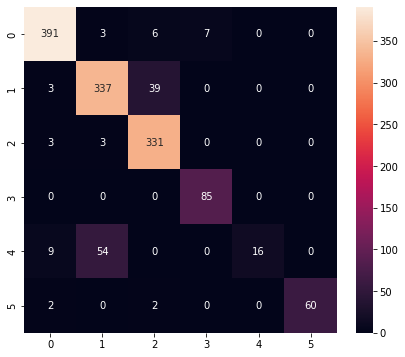

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       407
           1       0.85      0.89      0.87       379
           2       0.88      0.98      0.93       337
           3       0.92      1.00      0.96        85
           4       1.00      0.20      0.34        79
           5       1.00      0.94      0.97        64

    accuracy                           0.90      1351
   macro avg       0.93      0.83      0.84      1351
weighted avg       0.91      0.90      0.89      1351



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp8juer_22/assets


INFO:tensorflow:Assets written to: /tmp/tmp8juer_22/assets


6480

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 94 µs, sys: 7 µs, total: 101 µs
Wall time: 113 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.0615129e-02 6.9992769e-01 7.8241661e-02 1.0160905e-04 1.9109753e-01
 1.6454811e-05]
1
